In [1]:
import pandas as pd
import numpy as np
import torch
import sys

sys.path.insert(0, '../../../src/')
from utils.script_utils import create_parser, create_data_
sys.path.insert(0, '../../../scripts/')
from softmargin_run_new import add_arg_parser

In [2]:
seeds = np.arange(1,11).tolist()
num_conf = 1

parser = create_parser()
add_arg_parser(parser)
args = parser.parse_args("")
args.type_graph="data_deltas"

args.N = 95
args.d=10
args.h = 3
args.t_limit = 12 # Numbers of epoch of our epidemics spreading [0,1,...,T_limit-1]
args.lambda_ = 0.5 # probability of infection
args.mu = 0.02 # probability of recovery
args.p_edge = 1
args.scale=2
args.gamma=1e-3
args.ninf_min=5
args.small_lambda_limit=0
args.path_contacts="./work_13_contacts.npz"
path_dir = "./data"
if path_dir == "not_setted":
    path_dir = type_graph

In [3]:
from epigen import epidemy_gen_new

list_contacts = {}
data_={}
INSTANCES = []
for i_seed, seed in enumerate(seeds):
    print(f"\nSEED: {seed}")

    args.seed=seed
    args.num_conf=num_conf
    #print(args)
    temp, name_file, INSTANCE = create_data_(args, give_instance=True)
    print(str(INSTANCE))
    INSTANCES.append(INSTANCE)
    #Ns[cl] = int(max(temp["contacts"][:, 1]) + 1)
    list_contacts[seed] = temp["contacts"]
    data_[seed] = temp

data_.keys()


SEED: 1
number of contacts: 20856
Lim infected: 5, Lim max infected: 96
Num sources:  1
 # conf 1,mean infected: 53.0, mean recover: 7.0, max num infected: 53
0 (0.00%) epidemies refused

S:42, I:46, R:7
data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_1_pe_1

SEED: 2
number of contacts: 20856
Lim infected: 5, Lim max infected: 96
Num sources:  1
 # conf 1,mean infected: 45.0, mean recover: 2.0, max num infected: 45
0 (0.00%) epidemies refused

S:50, I:43, R:2
data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_2_pe_1

SEED: 3
number of contacts: 20856
Lim infected: 5, Lim max infected: 96
Num sources:  1
 # conf 1,mean infected: 29.0, mean recover: 0.0, max num infected: 29
0 (0.00%) epidemies refused

S:66, I:29, R:0
data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_3_pe_1

SEED: 4


../../../src/utils/script_utils.py:153: UserWarning: SAVING FOLDER DOES NOT EXIST
  warnings.warn("SAVING FOLDER DOES NOT EXIST")


number of contacts: 20856
Lim infected: 5, Lim max infected: 96
Num sources:  1
 # conf 1,mean infected: 31.0, mean recover: 4.0, max num infected: 31
0 (0.00%) epidemies refused

S:64, I:27, R:4
data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_4_pe_1

SEED: 5
number of contacts: 20856
Lim infected: 5, Lim max infected: 96
Num sources:  1
 # conf 1,mean infected: 54.0, mean recover: 3.0, max num infected: 54
0 (0.00%) epidemies refused

S:41, I:51, R:3
data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_5_pe_1

SEED: 6
number of contacts: 20856
Lim infected: 5, Lim max infected: 96
Num sources:  1
 # conf 1,mean infected: 59.0, mean recover: 3.0, max num infected: 59
0 (0.00%) epidemies refused

S:36, I:56, R:3
data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_6_pe_1

SEED: 7
number of contacts: 20856
Lim infected: 5, Lim max infected: 96
Num sources:  1
 # conf 1,mean infected: 63.0, mean recover: 3.0, max num infected: 63
0 (0.00%) epidemies refused

S:32, I:60, R:3
data_deltas_n_95_d_10_tl

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# READ DATA

create name_files

In [4]:
name_files_nn = {}
Ns = [args.N]
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_nn[seed] = {}
    for cl in range(len(Ns)):
        name_files_nn[seed][Ns[cl]] = {}
        name_file_init = path_dir + "/"
        #print(step, name_file_init)
        name_file_temp = name_file_init + f"eq_05_data_deltas_n_{Ns[cl]}_d_{args.d}_tlim_{args.t_limit}_lam_{args.lambda_}_mu_{args.mu}_s_{seed}_pe_{args.p_edge}"
        #name_file_temp += f"_{seed}"
        name_files_nn[seed][Ns[cl]] = name_file_temp

name_files_sib = {}
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_sib[seed] = {}
    for cl in range(len(Ns)):
        name_files_sib[seed][Ns[cl]] = {}
        name_file_init = path_dir + "/"
        #print(step, name_file_init)
        name_file_temp = name_file_init + f"N_{Ns[cl]}_d_{args.d}_h_{args.h}_T_{args.t_limit}_lam_{args.lambda_}_mu_{args.mu}_p_edge_{args.p_edge}"
        name_file_temp += f"_s_{seed}"
        name_files_sib[seed][Ns[cl]] = name_file_temp
            #print(name_file_temp)

In [5]:
name_files_nn

{1: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_1_pe_1'},
 2: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_2_pe_1'},
 3: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_3_pe_1'},
 4: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_4_pe_1'},
 5: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_5_pe_1'},
 6: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_6_pe_1'},
 7: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_7_pe_1'},
 8: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_8_pe_1'},
 9: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_9_pe_1'},
 10: {95: './data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_10_pe_1'}}

### READ FILES

In [6]:
#create dictorary containing data
ress = {}
for i_seed, seed in enumerate(seeds):
    print(f"SEED: {seed}")
    ress[seed] = {}
    for cl in range(len(Ns)):
        N_cl = Ns[cl]
        ress[seed][Ns[cl]] = []
        for instance_num in range(num_conf):
            #print(f" N: {N_cl} instance {instance_num}")
            ress[seed][Ns[cl]].append({})


SEED: 1
SEED: 2
SEED: 3
SEED: 4
SEED: 5
SEED: 6
SEED: 7
SEED: 8
SEED: 9
SEED: 10


In [7]:
for i_seed, seed in enumerate(seeds):
    print(f"SEED: {seed}")
    for cl in range(len(Ns)):
        N_cl = Ns[cl]
        for instance_num in range(num_conf):
            ress[seed][N_cl][instance_num]["regressive"] = {}
            name_temp = name_files_nn[seed][N_cl] +"_" + str(instance_num)
            print(f"Read N: {N_cl} instance {instance_num} - {name_temp}")
            try:
                ress[seed][N_cl][instance_num]["regressive"] = {}
                ress[seed][N_cl][instance_num]["regressive"]["marginals"] = np.load(name_temp + "_margs.npz",
                                                                        "r+",
                                                                       allow_pickle=True,
                                                                       fix_imports=True)["marginals"]
            except:
                print(f"  instance_num: {instance_num} NOT FOUND")
            try:
                ress[seed][N_cl][instance_num]["regressive"]["run"] = pd.read_csv(name_temp + "_trace.gz")
                #print(f"  instance_num: {instance_num}")
            except:
                print(f"gz no found {name_temp + '.gz'}")
                pass
            try:
                '''ress[seed][N_cl][instance_num]["regressive"]["net"] = torch.load(name_temp + ".pt",
                                                                      map_location=device)
                #ress[N_cl][instance_num]["regressive"]["net"].to(device)
                ress[seed][N_cl][instance_num]["regressive"]["net"].device = device
                for ll in ress[seed][N_cl][instance_num]["regressive"]["net"].sublayers:
                    for l in ll:
                        l.device=device
                print(f"  NN net: {instance_num}")'''
                pass
            except:
                print(f"  NN net: {instance_num} NON FOUND")

SEED: 1
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_1_pe_1_0
SEED: 2
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_2_pe_1_0
SEED: 3
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_3_pe_1_0
SEED: 4
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_4_pe_1_0
SEED: 5
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_5_pe_1_0
SEED: 6
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_6_pe_1_0
SEED: 7
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_7_pe_1_0
SEED: 8
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_8_pe_1_0
SEED: 9
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.5_mu_0.02_s_9_pe_1_0
SEED: 10
Read N: 95 instance 0 - ./data/eq_05_data_deltas_n_95_d_10_tlim_12_lam_0.

In [8]:
for i_seed, seed in enumerate(seeds):
    print(f"SEED: {seed}")
    for cl in range(len(Ns)):
        N_cl = Ns[cl]
        for instance_num in range(num_conf):
            print(f"Read N: {N_cl} instance {instance_num}")
            name_temp = name_files_sib[seed][N_cl] +"_" + str(instance_num)
            #name_temp = name_temp.replace("mu_0", "mu_0.0")
            ress[seed][N_cl][instance_num]["sib"] = {}
            try:
                ress[seed][N_cl][instance_num]["sib"]["marginals"] = np.load(name_temp + "_sib_margs.npz",
                                                                        "r+",
                                                                       allow_pickle=True,
                                                                       fix_imports=True)["marginals"]
                ress[seed][N_cl][instance_num]["sib"]["params"] = pd.read_csv(name_temp + "_params.gz")
                #print("load SIB")
            except:
                print(f"SIB not found {name_temp}")


SEED: 1
Read N: 95 instance 0
SEED: 2
Read N: 95 instance 0
SEED: 3
Read N: 95 instance 0
SEED: 4
Read N: 95 instance 0
SEED: 5
Read N: 95 instance 0
SEED: 6
Read N: 95 instance 0
SEED: 7
Read N: 95 instance 0
SEED: 8
Read N: 95 instance 0
SEED: 9
Read N: 95 instance 0
SEED: 10
Read N: 95 instance 0


In [9]:
ress[1][95][0]["regressive"]["run"].keys()

Index(['Unnamed: 0', 'step', 'beta', 'energy', 'std_energy', 'loss',
       'loss_std', 'S', 'I', 'R', 't_obs', 'num_source', 'max_grad',
       'num_zero_pw', 'N', 'T', 'p_source', 'p_sus', 'p_obs', 'p_w', 'mu',
       'lamb', 'max_Z'],
      dtype='object')

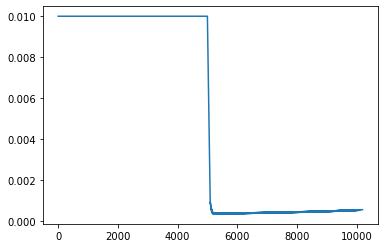

In [10]:
ax = ress[3][95][0]["regressive"]["run"]["lamb"].plot()
#ax.set_ylim(0.35, 0.37)
#ax.set_xlim(9300, 9400)

# results

In [11]:
#import utils.analysis
#from utils.analysis import sort_I
from imp import reload
#reload(utils.analysis)
data_.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [12]:
temp_params = {"lambda_sib":[], "lambda_nn":[], "mu_sib":[], "mu_nn":[]}
mu=[]
for cl in range(len(Ns)):
    for i_seed, seed in enumerate(seeds):
        for instance_num in range(num_conf):
            temp_params["lambda_sib"].append(ress[seed][Ns[cl]][instance_num]["sib"]["params"]["lambda"].iloc[-1])
            temp_params["lambda_nn"].append(ress[seed][N_cl][instance_num]["regressive"]["run"]["lamb"].iloc[-1])
            mu_sib = 1. - np.exp(-np.array(ress[seed][Ns[cl]][instance_num]["sib"]["params"]["mu"].iloc[-1]))
            temp_params["mu_sib"].append(mu_sib)
            temp_params["mu_nn"].append(ress[seed][N_cl][instance_num]["regressive"]["run"]["mu"].iloc[-1])
        #lambdas=pd.DataFrame(temp_params)

In [13]:
temp_params

{'lambda_sib': [0.0013590466296024,
  0.000984111218887,
  0.000630850881297,
  0.0009429412962413,
  0.0011208462918181,
  0.0010541174614906,
  0.0010389980139105,
  0.001108688989894,
  0.0009266994821192,
  0.0010429208502337],
 'lambda_nn': [0.0011021464597433,
  0.0008768692496232,
  0.0005640487070195,
  0.000660230172798,
  0.0009927642531692,
  0.0010042992653325,
  0.0010559842921793,
  0.0008432155009359,
  0.0006746815051883,
  0.0009358277311548],
 'mu_sib': [0.03465309342725165,
  0.014594697792287503,
  9.999994999843054e-07,
  0.04544851017673768,
  0.018398049874283284,
  0.012290232340554708,
  0.013130672175719504,
  0.01362896053746554,
  0.008579230491126855,
  0.026739699330473043],
 'mu_nn': [0.040586270391941,
  0.0130545888096094,
  9.999999974752427e-07,
  0.035659085959196,
  0.0156068010255694,
  0.0134930368512868,
  0.0125782499089837,
  0.0146912019699811,
  0.0106473369523882,
  0.0259963199496269]}

In [14]:
temp_params

{'lambda_sib': [0.0013590466296024,
  0.000984111218887,
  0.000630850881297,
  0.0009429412962413,
  0.0011208462918181,
  0.0010541174614906,
  0.0010389980139105,
  0.001108688989894,
  0.0009266994821192,
  0.0010429208502337],
 'lambda_nn': [0.0011021464597433,
  0.0008768692496232,
  0.0005640487070195,
  0.000660230172798,
  0.0009927642531692,
  0.0010042992653325,
  0.0010559842921793,
  0.0008432155009359,
  0.0006746815051883,
  0.0009358277311548],
 'mu_sib': [0.03465309342725165,
  0.014594697792287503,
  9.999994999843054e-07,
  0.04544851017673768,
  0.018398049874283284,
  0.012290232340554708,
  0.013130672175719504,
  0.01362896053746554,
  0.008579230491126855,
  0.026739699330473043],
 'mu_nn': [0.040586270391941,
  0.0130545888096094,
  9.999999974752427e-07,
  0.035659085959196,
  0.0156068010255694,
  0.0134930368512868,
  0.0125782499089837,
  0.0146912019699811,
  0.0106473369523882,
  0.0259963199496269]}

<BarContainer object of 2 artists>

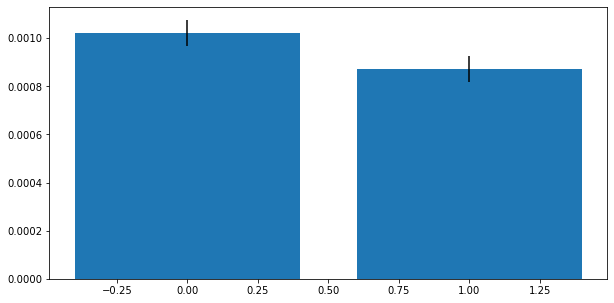

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10,5))
sib_m = np.array(temp_params["lambda_sib"]).mean()
nn_m = np.array(temp_params["lambda_nn"]).mean()
sib_std = np.array(temp_params["lambda_sib"]).std()/np.sqrt(10)
nn_std = np.array(temp_params["lambda_nn"]).std()/np.sqrt(10)
ax.bar([0,1], [sib_m, nn_m], yerr=[sib_std, nn_std])

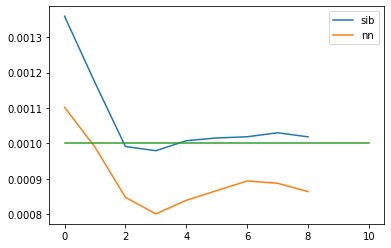

In [39]:
mean_sib = []
mean_nn = []
for i in range(1,len(temp_params["lambda_sib"])):
    mean_sib.append(np.array(temp_params["lambda_sib"][0:i]).mean())
    mean_nn.append(np.array(temp_params["lambda_nn"][0:i]).mean())
import matplotlib.pyplot as plt
plt.plot(np.array(mean_sib), label="sib")
plt.plot(np.array(mean_nn), label="nn")
plt.plot([0,len(temp_params["lambda_sib"])], [args.gamma, args.gamma])
plt.legend()

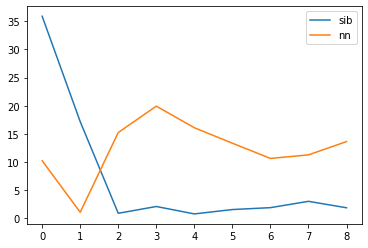

In [40]:
mean_sib = []
mean_nn = []
for i in range(1,10):
    mean_sib.append(np.array(temp_params["lambda_sib"][0:i]).mean())
    mean_nn.append(np.array(temp_params["lambda_nn"][0:i]).mean())
import matplotlib.pyplot as plt
plt.plot(100*abs(np.array(mean_sib)-args.gamma)/args.gamma, label="sib")
plt.plot(100*abs(np.array(mean_nn)-args.gamma)/args.gamma, label="nn")
plt.legend()

In [41]:
temp_params["lambda_nn"]

[0.0011021464597433,
 0.0008768692496232,
 0.0005640487070195,
 0.000660230172798,
 0.0009927642531692,
 0.0010042992653325,
 0.0010559842921793,
 0.0008432155009359,
 0.0006746815051883,
 0.0009358277311548]

In [42]:
np.array(mean_sib)

array([0.00135905, 0.00117158, 0.00099134, 0.00097924, 0.00100756,
       0.00101532, 0.0010187 , 0.00102995, 0.00101848])

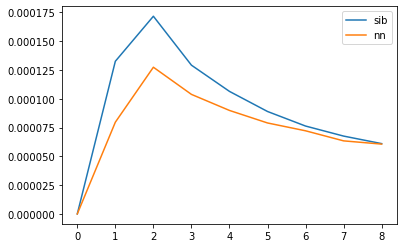

In [43]:
mean_sib = []
mean_nn = []
for i in range(1,10):
    mean_sib.append(np.array(temp_params["lambda_sib"][0:i]).std()/np.sqrt(i))
    mean_nn.append(np.array(temp_params["lambda_nn"][0:i]).std()/np.sqrt(i))
import matplotlib.pyplot as plt
plt.plot(abs(np.array(mean_sib)), label="sib")
plt.plot(abs(np.array(mean_nn)), label="nn")
plt.legend()

In [44]:
np.array(temp_params["lambda_nn"][0:10]).mean()

0.0008710067137144

<BarContainer object of 2 artists>

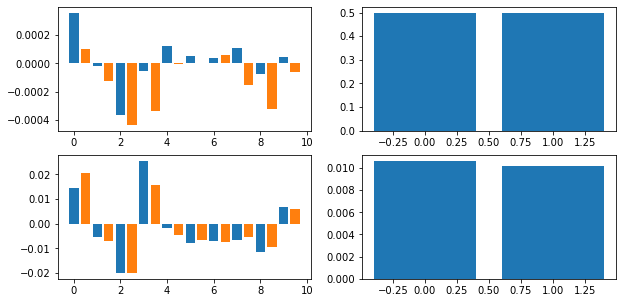

In [45]:
def err_param_rel(temp_params, key='lambda_sib', val_=args.lambda_):
    a = (100.*(np.abs(np.array(temp_params[key]) - val_))/args.lambda_).mean()
    return a
def err_param(temp_params, key='lambda_sib', val_=args.lambda_):
    a = (np.abs(np.array(temp_params[key]) - val_)).mean()
    return a

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(10,5))
x=np.arange(len(temp_params['lambda_sib']))
axs[0][0].bar(x, np.array(temp_params['lambda_sib']) - args.gamma, width=0.4)
axs[0][0].bar(x+0.5, np.array(temp_params['lambda_nn']) - args.gamma, width=0.4)
axs[1][0].bar(x, np.array(temp_params['mu_sib']) - args.mu, width=0.4)
axs[1][0].bar(x+0.5, np.array(temp_params['mu_nn']) - args.mu, width=0.4)
err_sib_lam = err_param(temp_params, key='lambda_sib')
err_nn_lam = err_param(temp_params, key='lambda_nn')
err_sib_mu = err_param(temp_params, key='mu_sib', val_=args.mu)
err_nn_mu = err_param(temp_params, key='mu_nn', val_=args.mu)

axs[0][1].bar([0,1], [err_sib_lam, err_nn_lam], width=0.8)
axs[1][1].bar([0,1], [err_sib_mu, err_nn_mu], width=0.8)

No handles with labels found to put in legend.


[99.87382982]
[99.88719026]
[5.08970204]
[4.11725408]


<BarContainer object of 2 artists>

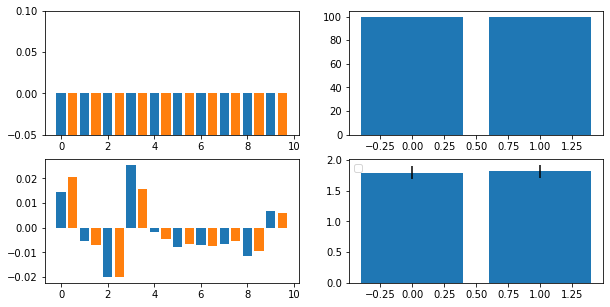

In [46]:
def err_param_rel(temp_params, key='lambda_sib', val_=args.lambda_, outliers=0.1):
    err = 100.*(np.abs(np.array(temp_params[key]) - val_))/args.lambda_
    num_outliers=int(len(err)*outliers)
    err[::-1].sort()
    a = err[num_outliers:].mean()
    a_err = err[num_outliers:].std()
    print(err[:num_outliers])
    return a, a_err
def err_param(temp_params, key='lambda_sib', val_=args.lambda_, outliers=0.1):
    err = np.abs(np.array(temp_params[key]) - val_)
    num_outliers=int(len(err)*outliers)
    err[::-1].sort()
    a = err[num_outliers:].mean()
    a_err = err[num_outliers:].std()
    print(err[:num_outliers])
    return a, a_err
N=args.N
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(10,5))
x=np.arange(len(temp_params['lambda_sib']))
axs[0][0].bar(x, np.array(temp_params['lambda_sib']) - args.lambda_, width=0.4)
axs[0][0].bar(x+0.5, np.array(temp_params['lambda_nn']) - args.lambda_, width=0.4)
axs[1][0].bar(x, np.array(temp_params['mu_sib']) - args.mu, width=0.4)
axs[1][0].bar(x+0.5, np.array(temp_params['mu_nn']) - args.mu, width=0.4)
err_sib_lam, std_sib_lam = err_param_rel(temp_params, key='lambda_sib')
err_nn_lam, std_nn_lam = err_param_rel(temp_params, key='lambda_nn')
err_sib_mu, std_sib_mu = err_param_rel(temp_params, key='mu_sib', val_=args.mu)
err_nn_mu, std_nn_mu = err_param_rel(temp_params, key='mu_nn', val_=args.mu)
axs[0][0].set_ylim(-0.05,0.1)
plt.legend()
axs[0][1].bar([0,1], [err_sib_lam, err_nn_lam], width=0.8, yerr=[std_sib_lam/np.sqrt(N), std_nn_lam/np.sqrt(N)])
axs[1][1].bar([0,1], [err_sib_mu, err_nn_mu],yerr=[std_sib_mu/np.sqrt(N), std_nn_mu/np.sqrt(N)], width=0.8)

In [47]:
np.array(temp_params["lambda_nn"]).mean()

0.0008710067137144

In [49]:
import pandas as pd
params_df = pd.DataFrame(temp_params)
params_df["mu"] = [args.mu]*len(params_df)
params_df["lambda"] = [args.gamma]*len(params_df)
params_df.to_csv("res_params.gz")
params_df

,lambda_sib,lambda_nn,mu_sib,mu_nn,mu,lambda
0,0.001359,0.001102,3.465309e-02,4.058627e-02,0.02,0.001
1,0.000984,0.000877,1.459470e-02,1.305459e-02,0.02,0.001
2,0.000631,0.000564,9.999995e-07,1.000000e-06,0.02,0.001
3,0.000943,0.000660,4.544851e-02,3.565909e-02,0.02,0.001
4,0.001121,0.000993,1.839805e-02,1.560680e-02,0.02,0.001
5,0.001054,0.001004,1.229023e-02,1.349304e-02,0.02,0.001
6,0.001039,0.001056,1.313067e-02,1.257825e-02,0.02,0.001
7,0.001109,0.000843,1.362896e-02,1.469120e-02,0.02,0.001
8,0.000927,0.000675,8.579230e-03,1.064734e-02,0.02,0.001
9,0.001043,0.000936,2.673970e-02,2.599632e-02,0.02,0.001


<BarContainer object of 2 artists>

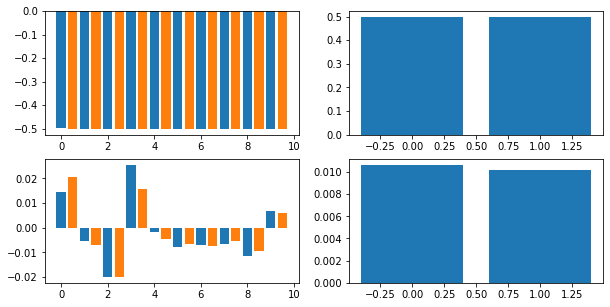

In [26]:
def err_param_rel(temp_params, key='lambda_sib', val_=args.lambda_):
    a = (100.*(np.abs(np.array(temp_params[key]) - val_))/args.lambda_).mean()
    return a
def err_param(temp_params, key='lambda_sib', val_=args.lambda_):
    a = (np.abs(np.array(temp_params[key]) - val_)).mean()
    return a

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(10,5))
x=np.arange(len(temp_params['lambda_sib']))
axs[0][0].bar(x, np.array(temp_params['lambda_sib']) - args.lambda_, width=0.4)
axs[0][0].bar(x+0.5, np.array(temp_params['lambda_nn']) - args.lambda_, width=0.4)
axs[1][0].bar(x, np.array(temp_params['mu_sib']) - args.mu, width=0.4)
axs[1][0].bar(x+0.5, np.array(temp_params['mu_nn']) - args.mu, width=0.4)
err_sib_lam = err_param(temp_params, key='lambda_sib')
err_nn_lam = err_param(temp_params, key='lambda_nn')
err_sib_mu = err_param(temp_params, key='mu_sib', val_=args.mu)
err_nn_mu = err_param(temp_params, key='mu_nn', val_=args.mu)

axs[0][1].bar([0,1], [err_sib_lam, err_nn_lam], width=0.8)
axs[1][1].bar([0,1], [err_sib_mu, err_nn_mu], width=0.8)

In [27]:
from utils.analysis import sort_I 

true_sources = {}
nn_sources = {}
sib_sources = {}
sm_sources = {}
rnd_sources_I = {}
rnd_sources = {}
Is={}
for cl in range(len(Ns)):
    true_sources[cl] = []
    nn_sources[cl] = []
    sib_sources[cl] = []
    rnd_sources[cl] = []
    rnd_sources_I[cl] = []
    sm_sources[cl] = []
    Is[cl] = []
    for i_seed, seed in enumerate(seeds):
        print(f"\nSEED: {seed}")

        for i in range(num_conf):
            true_sources[cl].append(np.argmin(data_[seed]["epidemy"][i][0][0]))
            nn_sources[cl].append(sort_I(ress[seed][Ns[cl]][i]["regressive"]["marginals"], 0))
            sib_sources[cl].append(sort_I(ress[seed][Ns[cl]][i]["sib"]["marginals"], 0))
            Is[cl].append((data_[seed]["epidemy"][i][0][0] != np.inf).sum())
            rnd_sources[cl].append(np.random.randint(0,Ns[cl]))
            rnd_sources_I[cl].append(np.random.randint(0,Is[cl][-1]))
            sm_sources[cl].append({})

ModuleNotFoundError: No module named 'utils.analysis'

In [ ]:
avg_source_nn = {}
avg_source_sib = {}
avg_source_sm = {}
avg_source_rnd = {}
avg_source_rnd_I = {}
avg_source_nn_norm = {}
avg_source_sib_norm = {}
avg_source_sm_norm = {}
avg_source_rnd_norm = {}
enum=0
bins=20

for cl in range(len(Ns)):
    avg_source_nn[cl] = np.zeros(Ns[cl], dtype=float)
    avg_source_sib[cl] = np.zeros(Ns[cl], dtype=float)
    avg_source_rnd[cl] = np.zeros(Ns[cl], dtype=float)
    avg_source_rnd_I[cl] = np.zeros(Ns[cl], dtype=float)

    #print(nalpha)
    avg_source_sm[cl] = {}
    for n in range(Ns[cl]):
        for i in range(len(true_sources[cl])):
            avg_source_nn[cl][n] += true_sources[cl][i] in nn_sources[cl][i][:n+1,1]
            avg_source_sib[cl][n] += true_sources[cl][i] in sib_sources[cl][i][:n+1,1]
            avg_source_rnd[cl][n] += n+1 > rnd_sources[cl][i]
            avg_source_rnd_I[cl][n] += n+1 > rnd_sources_I[cl][i]
for cl in range(len(Ns)):
    avg_source_nn_norm[cl] = np.zeros(bins, dtype=float)
    avg_source_sib_norm[cl] = np.zeros(bins, dtype=float)
    avg_source_rnd_norm[cl] = np.zeros(bins, dtype=float)

    #print(nalpha)
    avg_source_sm_norm[cl] = {}
    for n in range(0, bins):
        for i in range(len(true_sources[cl])):
            I = Is[cl][i]
            step_I = I / bins
            pos_bins = int(step_I * n)
            pos_bins_1 = int(step_I * (n+1))
            if n == bins-1:
                pos_bins_1 = I

            avg_source_nn_norm[cl][n] += true_sources[cl][i] in nn_sources[cl][i][:pos_bins_1,1]
            avg_source_sib_norm[cl][n] += true_sources[cl][i] in sib_sources[cl][i][:pos_bins_1,1]
            avg_source_rnd_norm[cl][n] += pos_bins_1 > rnd_sources_I[cl][i]


In [ ]:
cl = 0
avg_source_pd = pd.DataFrame(data={"nn":avg_source_nn[cl], "sib":avg_source_sib[cl], 
                                   "rnd":avg_source_rnd[cl], "rnd_I":avg_source_rnd_I[cl]})
for nsim in nsims:
    for alpha in range(nalpha): 
        avg_source_pd[f"sm_{nsim}_{args.a_min+alpha*args.a_step:.2f}"] = avg_source_sm[cl][nsim][alpha]

avg_source_pd_norm = pd.DataFrame(data={"nn":avg_source_nn_norm[cl], 
                                        "sib":avg_source_sib_norm[cl],
                                       "rnd":avg_source_rnd_norm[cl]})
for nsim in nsims:
    for alpha in range(nalpha): 
        avg_source_pd_norm[f"sm_{nsim}_{args.a_min+alpha*args.a_step:.2f}"] = avg_source_sm_norm[cl][nsim][alpha]

avg_source_pd

In [ ]:
avg_source_pd.to_csv("results.gz")
avg_source_pd_norm.to_csv("results_norm.gz")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
name="Greens"
colors = plt.get_cmap(name)

y_nn = np.insert(avg_source_nn[cl]/avg_source_nn[cl][-1],0,0)
y_sib = np.insert(avg_source_sib[cl]/avg_source_sib[cl][-1],0,0)
y_rnd = np.insert(avg_source_rnd[cl]/avg_source_rnd[cl][-1],0,0)
y_rnd_I = np.insert(avg_source_rnd_I[cl]/avg_source_rnd_I[cl][-1],0,0)
N = len(avg_source_nn[cl])
x = np.arange(N+1)/N
cl=0
plt.plot(x, y_rnd, "--", label=f"random -- auc: {auc(x, y_rnd):.3f}", color="black")
plt.plot(x, y_rnd_I, "--", label=f"random (only I) -- auc: {auc(x, y_rnd_I):.3f}", color="black")

for i, nsim in enumerate(nsims[1:]):
    alpha=21
    #for alpha in range(len(avg_source_sm[cl][nsim])):
    y_sm = np.insert(avg_source_sm[cl][nsim][alpha]/avg_source_sm[cl][nsim][alpha][-1],0,0)
    #print(alpha, avg_source_sm[cl][alpha])
    plt.plot(x, y_sm, ":",
             label=f"sm - {args.a_min+alpha*args.a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim:.0e}", 
             color=colors(np.clip(i/len(nsims[1:]), 0.3, 0.9)), lw=2)
plt.plot(x, y_sib, "-.", label=f"sib -- auc: {auc(x, y_sib):.3f}", linewidth="2")
plt.plot(x, y_nn, label=f"nn -- auc: {auc(x, y_nn):.3f}", linewidth="2")

plt.legend()
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{len(true_sources[0])}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
y_nn = np.insert(avg_source_nn[cl]/avg_source_nn[cl][-1],0,0)
y_sib = np.insert(avg_source_sib[cl]/avg_source_sib[cl][-1],0,0)
N = len(avg_source_nn[cl])
x = np.insert(np.arange(N)/N,0,0)
cl=0
#plt.plot(x, y_nn, label=f"nn -- auc: {auc(x, y_nn):.3f}")
#plt.plot(x, y_sib, label=f"sib -- auc: {auc(x, y_sib):.3f}")

for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(avg_source_sm[cl][nsim])):
        y_sm = np.insert(avg_source_sm[cl][nsim][alpha]/avg_source_sm[cl][nsim][alpha][-1],0,0)
        #print(alpha, avg_source_sm[cl][alpha])
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
name="Greens"
colors = plt.get_cmap(name)

y_nn = np.insert(avg_source_nn_norm[cl]/avg_source_nn_norm[cl][-1],0,0)
y_sib = np.insert(avg_source_sib_norm[cl]/avg_source_sib_norm[cl][-1],0,0)
y_rnd = np.insert(avg_source_rnd_norm[cl]/avg_source_rnd_norm[cl][-1],0,0)
N = len(avg_source_nn_norm[cl])
x = np.arange(N+1)/N
cl=0
plt.plot(x, y_rnd, "--", label=f"random -- auc: {auc(x, y_rnd):.3f}", color="black")

for i, nsim in enumerate(nsims[1:]):
    alpha=21
    #for alpha in range(len(avg_source_sm[cl][nsim])):
    y_sm = np.insert(avg_source_sm_norm[cl][nsim][alpha]/avg_source_sm_norm[cl][nsim][alpha][-1],0,0)
    #print(alpha, avg_source_sm[cl][alpha])
    plt.plot(x, y_sm, ":",
             label=f"sm - {args.a_min+alpha*args.a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim:.0e}", 
             color=colors(np.clip(i/len(nsims[1:]), 0.3, 0.9)), lw=2)
plt.plot(x, y_sib, "-.", label=f"sib -- auc: {auc(x, y_sib):.3f}", linewidth="2")
plt.plot(x, y_nn, label=f"nn -- auc: {auc(x, y_nn):.3f}", linewidth="2")

plt.legend()
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{len(true_sources[0])}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
y_nn = np.insert(avg_source_nn_norm[cl]/avg_source_nn_norm[cl][-1],0,0)
y_sib = np.insert(avg_source_sib[cl]/avg_source_sib[cl][-1],0,0)
N = len(avg_source_nn_norm[cl])
x = np.arange(N+1)/N
cl=0
#plt.plot(x, y_nn, label=f"nn -- auc: {auc(x, y_nn):.3f}")
#plt.plot(x, y_sib, label=f"sib -- auc: {auc(x, y_sib):.3f}")

for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(avg_source_sm_norm[cl][nsim])):
        y_sm = np.insert(avg_source_sm_norm[cl][nsim][alpha]/avg_source_sm_norm[cl][nsim][alpha][-1],0,0)
        #print(alpha, avg_source_sm[cl][alpha])
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)

In [52]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('-l', '--list', help='delimited list input', type=str)
args = parser.parse_args()
my_list = [int(item) for item in args.list.split(',')]

usage: ipykernel_launcher.py [-h] [-l LIST]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/indaco/.local/share/jupyter/runtime/kernel-8a786f1f-db77-40dd-9ac0-1255050037a7.json


SystemExit: 2